In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from EvEye.utils.processor.TxtProcessor import TxtProcessor
from pathlib import Path

In [40]:
directory_path = Path(
    "/mnt/data2T/junyuan/eye-tracking/datasets/DavisEyeCenterDataset/test/data"
)
txt_path = Path(
    "/mnt/data2T/junyuan/eye-tracking/datasets/DavisEyeCenterDataset/train/data/user1_left_session_1_0_1_events.txt"
)
time_window = 40000
bins_interval = 200
bins_num = 100

In [19]:
def get_bins_labels(bins_interval, bins_num):
    bins = []
    bins_labels = []
    for i in range(bins_num + 1):
        bins.append(i * bins_interval)
    for i in range(bins_num):
        bins_labels.append(f"{i*bins_interval}-{(i+1)*bins_interval}")
    return bins, bins_labels

In [20]:
def filter_counts(
    bins_numeric, time_window_counts, bins_labels, threshold=5000, apply_threshold=True
):
    if apply_threshold:
        # 过滤掉 time_window_counts 中大于 threshold 的项
        filtered_indices = time_window_counts <= threshold
        filtered_bins_numeric = bins_numeric[filtered_indices]
        filtered_time_window_counts = time_window_counts[filtered_indices]
        filtered_bins_labels = np.array(bins_labels)[filtered_indices]
    else:
        filtered_bins_numeric = bins_numeric
        filtered_time_window_counts = time_window_counts
        filtered_bins_labels = bins_labels

    return filtered_bins_numeric, filtered_time_window_counts, filtered_bins_labels

In [21]:
def process_txt_file(txt_path, time_window):
    events = TxtProcessor(txt_path).load_events_from_txt()
    events['t'] -= events['t'][0]
    ts = events['t']
    start_time, end_time = ts[0], ts[-1]
    num_intervals = int((end_time - start_time) // time_window) + 1
    event_counts = np.zeros(num_intervals)
    for t in ts:
        index = t // time_window
        event_counts[int(index)] += 1
    return event_counts

In [22]:
all_event_counts = []
for txt_file in os.listdir(directory_path):
    if txt_file.endswith(".txt"):
        txt_path = directory_path / txt_file
        event_counts = process_txt_file(txt_path, time_window)
        all_event_counts.extend(event_counts)

all_event_counts = np.array(all_event_counts)

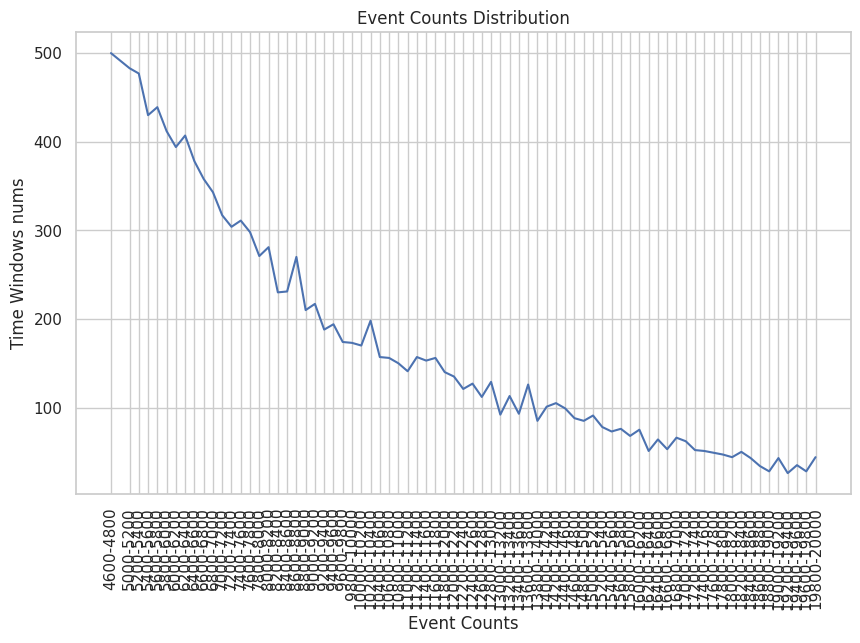

In [43]:
bins, bins_labels = get_bins_labels(bins_interval, bins_num)
time_window_counts = np.histogram(all_event_counts, bins=bins)[0]
bins_numeric = np.arange(len(bins_labels))

filtered_bins_numeric, filtered_time_window_counts, filtered_bins_labels = (
    filter_counts(
        bins_numeric,
        time_window_counts,
        bins_labels,
        threshold=500,
        apply_threshold=True,
    )
)

# 使用 Seaborn 绘制带有回归拟合的曲线
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
# sns.barplot(x=filtered_bins_labels, y=filtered_time_window_counts, palette="viridis")
# sns.regplot(x=filtered_bins_numeric, y=filtered_time_window_counts, marker='o', ci=None)
# sns.histplot(
#     x=filtered_bins_numeric,
#     weights=filtered_time_window_counts,
#     bins=len(filtered_bins_numeric),
#     # bins="auto",
#     kde=True,
# )
sns.lineplot(x=filtered_bins_numeric, y=filtered_time_window_counts)
plt.xlabel('Event Counts')
plt.ylabel('Time Windows nums')
plt.title('Event Counts Distribution')
plt.xticks(ticks=filtered_bins_numeric, labels=filtered_bins_labels, rotation=90)
plt.show()

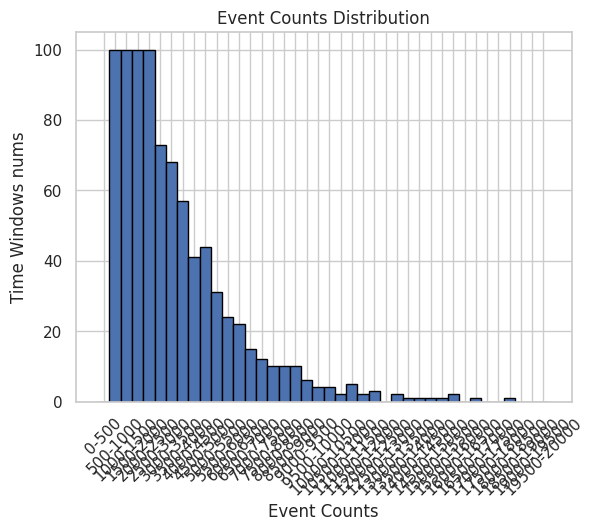

In [24]:
bins, bins_labels = get_bins_labels(bins_interval, bins_num)
time_window_counts = np.histogram(event_counts, bins=bins)[0]
time_window_counts[time_window_counts > 100] = 100
plt.bar(bins_labels, time_window_counts, width=1.0, edgecolor='black')
plt.xlabel('Event Counts')
plt.ylabel('Time Windows nums')
plt.title('Event Counts Distribution')
plt.xticks(rotation=45)
plt.show()

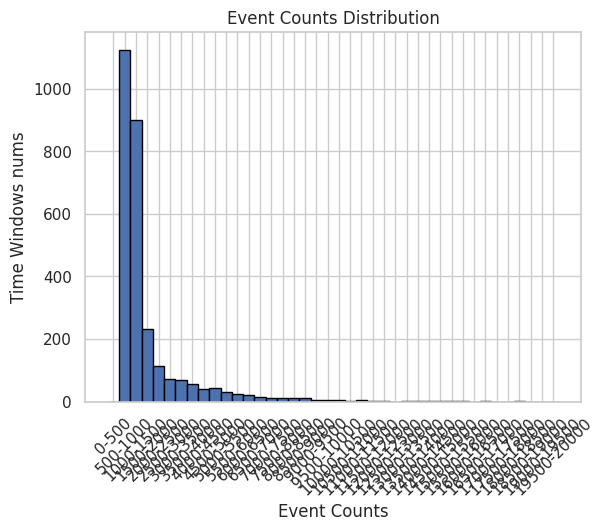

In [25]:
bins, bins_labels = get_bins_labels(bins_interval, bins_num)
time_window_counts = np.histogram(event_counts, bins=bins)[0]
plt.bar(bins_labels, time_window_counts, width=1.0, edgecolor='black')
plt.xlabel('Event Counts')
plt.ylabel('Time Windows nums')
plt.title('Event Counts Distribution')
plt.xticks(rotation=45)
plt.show()